In [1]:
import yfinance as yf
import pmdarima as pm

In [2]:
tick = 'ITC.NS'

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

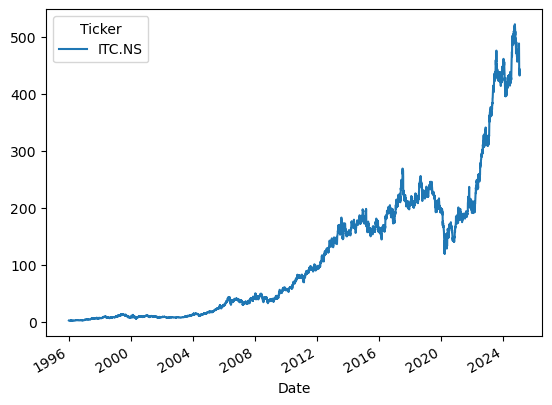

In [3]:
yf.download(tick).Close.plot()

In [4]:
df= yf.download("ITC.NS", start="2020-05-13", end="2024-05-13", rounding=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
arima_model=pm.auto_arima(
    y=df['Close'],
    start_p=2, start_q=1,
    max_p=5, max_q=5, max_d=1, trace = True 
)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5451.614, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5446.107, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5447.731, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5447.737, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5450.056, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5449.913, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.784 seconds


In [6]:
arima_model.predict(4) #to predict 4 days ahead

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


991    426.093444
992    426.386889
993    426.680333
994    426.973778
dtype: float64

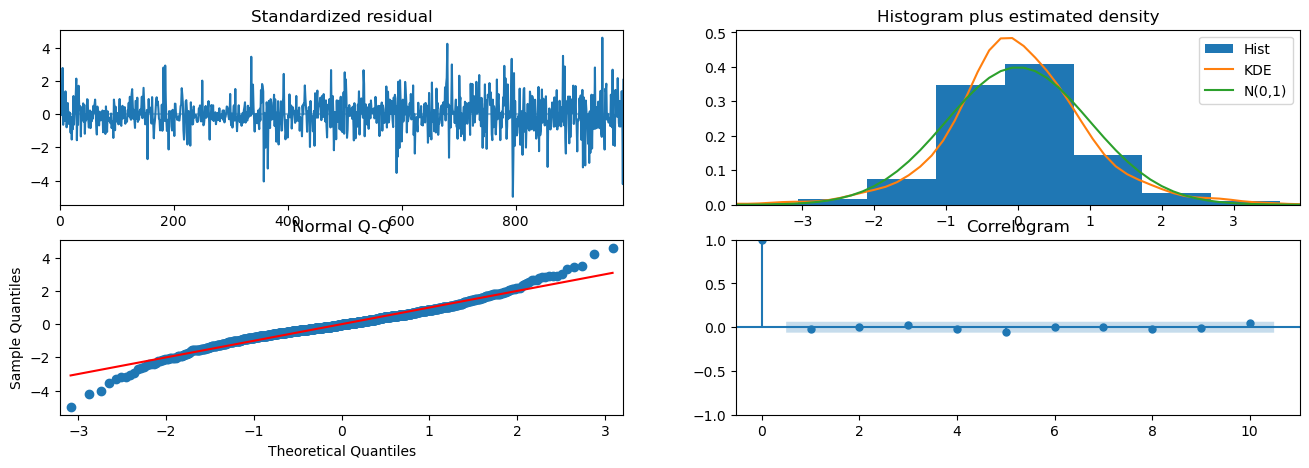

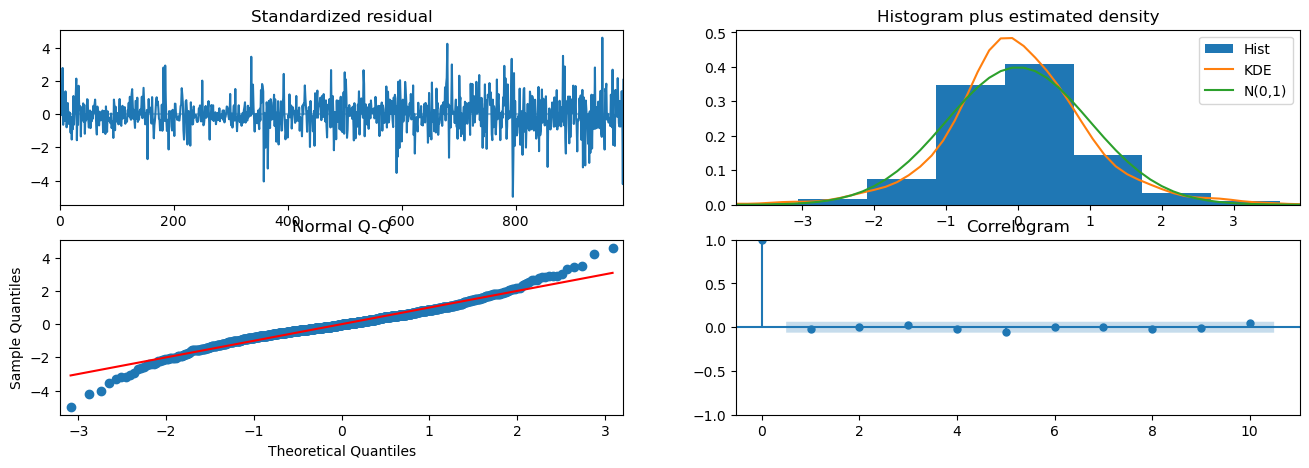

In [8]:
arima_model.plot_diagnostics(figsize=(16,5))